# Real estate
Clean and generate queries

In [1]:
# imports and method definition cell
import pandas as pd
import numpy as np
import os
from relationalquerygeneration import *
import pyarrow.parquet as pq
import pyarrow as pa
import chardet


def cleanup(out):
    for file in os.listdir(out):
        if file.endswith(".pkl"):
            path_to_file = os.path.join(out, file)
            os.remove(path_to_file)
    # make sure directory is empty
    assert len(os.listdir(out)) <= 1, "Directory not empty"

# controls k 
ALPHA = 10

In [4]:
df = pd.read_csv('data/skipping_data_raw/Real_Estate_Sales_2001-2020_GL.csv')

# drop all columns besides List Year, Town
# df = df[['List Year', 'Town', 'Address', 'Assessed Value', 'Sale Amount']]
df = df[['List Year', 'Town', 'Address']]


# drop all rows with missing values
df = df.dropna()

# remove non alphabetic characters except spaces
df['Address'] = df['Address'].str.replace('[^a-zA-Z\s]', '')

# remove leading and trailing spaces
df['Address'] = df['Address'].str.strip()

print("Number of rows remaining: " + str(len(df.index)))
print("Number of unique streets: " + str(len(df['Address'].unique())))
print("Number of unique towns: " + str(len(df['Town'].unique())))

# sort by year
df = df.sort_values(by=['List Year'], ascending=False)

# base = 1.25

# df['utility'] = base**(df['List Year'] - df['List Year'].min()+1.0) + np.random.uniform(0, 10, len(df.index))   

# # sort df by utility
# df = df.sort_values(by=['utility'], ascending=False)
# # reset index
# df = df.reset_index(drop=True)

# # remove spaces in column names
# df.columns = df.columns.str.replace(' ', '')
df = df.reset_index(drop=True)
df.head()

/var/folders/q7/3yvrc6352t1c2bwlqpsvkzy80000gn/T/ipykernel_38443/440935785.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/skipping_data_raw/Real_Estate_Sales_2001-2020_GL.csv')
/var/folders/q7/3yvrc6352t1c2bwlqpsvkzy80000gn/T/ipykernel_38443/440935785.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Address'] = df['Address'].str.replace('[^a-zA-Z\s]', '')


Number of rows remaining: 997162
Number of unique streets: 99752
Number of unique towns: 170


,List Year,Town,Address
0,2020,Ansonia,WAKELEE AVE
1,2020,Middletown,YELLOW ORANGE CIRCLE
2,2020,Plymouth,HOYE ST
3,2020,Middletown,INTOWN TERR
4,2020,Old Saybrook,CAPTAINS LA


In [5]:
start=0
df.groupby(['Town',	'Address']).size().sort_values(ascending=False).iloc[start:start+3000]

Town        Address           
Southbury   A HERITAGE VILLAGE    690
            B HERITAGE VILLAGE    664
            B HERITAGE VLG        644
            A HERITAGE VLG        622
Vernon      OLD TOWN RD           488
                                 ... 
Bridgeport  LANCE CIRCLE           45
Waterbury   STODDARD RD            45
Cheshire    HARRISON RD            45
Suffield    HALLADAY DR            45
Plainville  WILLIAMS ST            45
Length: 3000, dtype: int64

In [6]:
k = int(45/2)
print('k:', k)

k: 22


Generated 2500 queries
Average position: 0.3031235378002772
Max position: 0.9107527162086


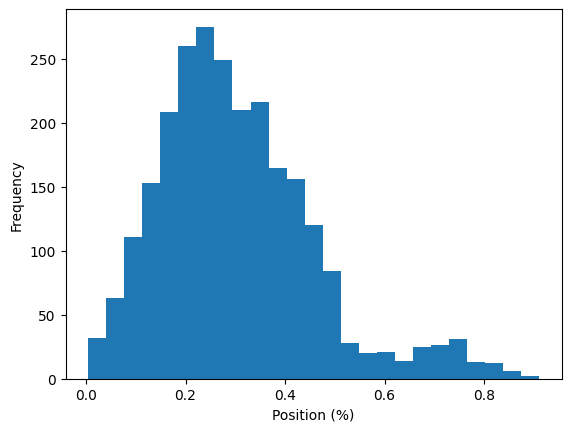

In [7]:
n_queries = 2500

df_no_listyr  = df.drop(columns=['List Year'])

rg = RelationalGeneratorAccessFreq(df_no_listyr)

cat_columns = ['Town', 'Address']

out = "data/access_frequency_skipping_data/Real_Estate/queries"

cleanup(out)

# rg.generate_queries(cat_columns, k, n_queries, out, 0.5, 0.4)
access_frequencies = rg.generate_queries(cat_columns, k, n_queries, out, 0.6, 0.5, start = start)

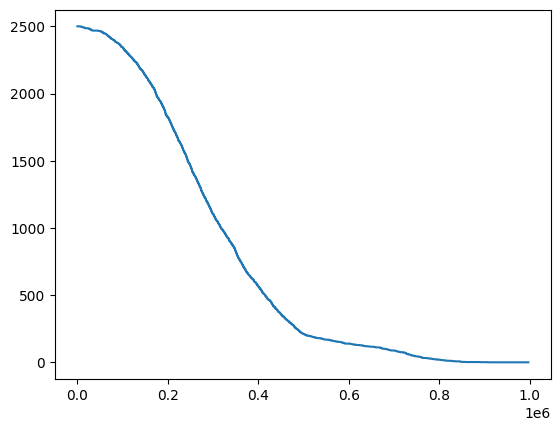

In [8]:
plt.plot(access_frequencies)

In [9]:
np.save('data/access_frequency_skipping_data/Real_Estate/utilities/utilities.npy', access_frequencies)

In [10]:
# rg_size = 500
# rg_size = 2500
rg_size = 2000
# rg_size = 1000

df = df.drop(columns=['List Year'])

# write to parquet with row group size rg_size
pq.write_table(pa.Table.from_pandas(df), 'data/access_frequency_skipping_data/Real_Estate/parquet/Real_Estate_Sales_2001-2020.parquet', row_group_size=rg_size)

# Electric vehicles
Clean and generate queries


In [23]:
df = pd.read_csv('data/skipping_data_raw/Electric_Vehicle_Population_Data.csv')

df = df[['County', 'City', 'Postal Code', 'Model Year' ,'Make','Model', 'Legislative District']]

df = df.dropna()

# sort by model year
df = df.sort_values(by=['Model Year'], ascending=False)

# base = 1.18

# df['utility'] = base**(df['Model Year'] - df['Model Year'].min()+1.0) + np.random.uniform(0, 10, len(df.index))

# # sort df by utility
# df = df.sort_values(by=['utility'], ascending=False)

# # reset index
df = df.reset_index(drop=True)

df['Legislative District'] = df['Legislative District'].astype(int).astype(str)
df['Postal Code'] = df['Postal Code'].astype(int).astype(str)

df.head()

,County,City,Postal Code,Model Year,Make,Model,Legislative District
0,Spokane,Spokane,99205,2024,JEEP,WRANGLER,3
1,King,Snoqualmie,98065,2024,MAZDA,CX-90,5
2,King,Seattle,98103,2024,VOLVO,XC60,43
3,Chelan,Manson,98831,2024,BMW,X5,12
4,Pierce,Auburn,98092,2024,JEEP,WRANGLER,31


In [26]:
# # remove whitespaces frmo column names

start = 0
k = int(10//2)
print('k:', k)
df.groupby(['County', 'City', 'Postal Code', 'Model Year' ,'Make','Model', 'Legislative District']).size().sort_values(ascending=False).iloc[start:start+2500]

df.columns = df.columns.str.replace(' ', '')

# k = 10
n_queries = 2500

df_no_modelyr  = df.drop(columns=['ModelYear'])



Generated 2500 queries
Average position: 0.29375923805776055
Max position: 0.9861470637062907


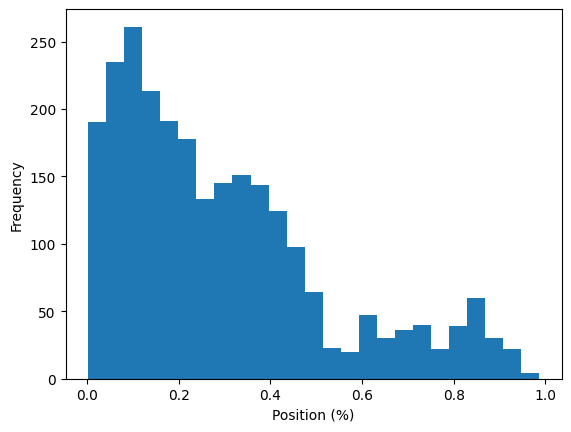

In [27]:
cat_columns = ['County', 'City', 'PostalCode', 'Make', 'Model', 'LegislativeDistrict']

out = "data/access_frequency_skipping_data/Electric_Vehicles/queries"

cleanup(out)

rg = RelationalGeneratorAccessFreq(df_no_modelyr)

# rg.generate_queries(cat_columns, k, n_queries, out, 0.5, 0.4)
access_frequencies = rg.generate_queries(cat_columns, k, n_queries, out, 0.6, 0.5, start=start)

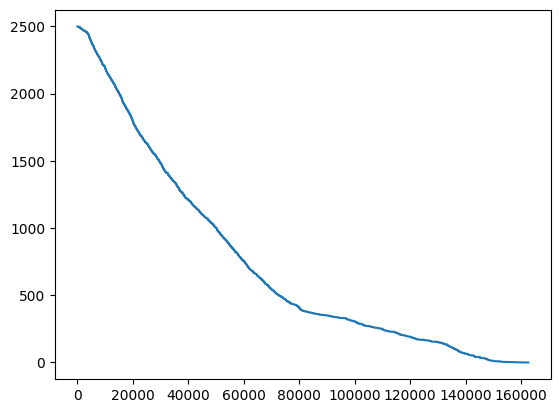

In [28]:
plt.plot(access_frequencies)

In [29]:
np.save('data/access_frequency_skipping_data/Electric_Vehicles/utilities/utilities.npy', access_frequencies)

In [30]:
rg_size = 350

# remove utility and modelyear columns
df = df.drop(columns=['ModelYear'])

# write to parquet with row group size rg_size
pq.write_table(pa.Table.from_pandas(df), 'data/access_frequency_skipping_data/Electric_Vehicles/parquet/Electric_Vehicle_Population_Data.parquet', row_group_size=rg_size)


# NASA HTTP logs
Cleaning and query generation

In [31]:
raw_nasa_files = ['data/skipping_data_raw/NASA_access_log_Aug95', 'data/skipping_data_raw/NASA_access_log_Jul95']

# detect encoding of files on first 1000 lines
encoding_types = []
for file in raw_nasa_files:
    with open(file, 'rb') as f:
        result = chardet.detect(f.read(10000))
        encoding_types.append(result['encoding'])
    
assert encoding_types[0] == encoding_types[1], "Files have different encodings"

# read in files with detected encoding
lines = []
for file in raw_nasa_files:
    i = 0
    with open(file, encoding=encoding_types[0]) as f:
        while True:
            try:
                line = f.readline()
                if not line:
                    break
                lines.append(line)
            except:
                print("Line {} not added in file {}".format(i, file))
            i += 1

Line 613123 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 613508 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 829742 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 1437373 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 1516936 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 1530211 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 1538760 not added in file data/skipping_data_raw/NASA_access_log_Aug95
Line 118894 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 118895 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 550847 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 1031344 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 1352887 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 1453988 not added in file data/skipping_data_raw/NASA_access_log_Jul95
Line 1498504 not a

In [32]:
# split lines into columns
lines = [line.split(' ') for line in lines]
# create pandas dataframe from lines
print("Number of rows original: " + str(len(lines)))
lines = [line for line in lines if len(line) == 10]
print("Number of rows remaining: " + str(len(lines)))
df = pd.DataFrame(lines, columns=['Host', 'Junk1', 'Junk2', 'Timestamp', 'Junk3', 'RequestType', 'Asset', 'Junk4', 'Junk5', 'Junk6'])

Number of rows original: 3460463
Number of rows remaining: 3452337


In [33]:
# drop rows with missing values
df = df.dropna()

# remove brackets from timestamp and convert to datetime
df['Timestamp'] = df['Timestamp'].str.replace('[', '')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%b/%Y:%H:%M:%S')

# remove quote from request type
df['RequestType'] = df['RequestType'].str.replace('"', '')

# remove all columns with name starting with Junk
df = df[df.columns.drop(list(df.filter(regex='Junk')))]
# drop request type column
df = df.drop(columns=['RequestType'])

df.head()

/var/folders/q7/3yvrc6352t1c2bwlqpsvkzy80000gn/T/ipykernel_38443/554104093.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Timestamp'] = df['Timestamp'].str.replace('[', '')


,Host,Timestamp,Asset
0,in24.inetnebr.com,1995-08-01 00:00:01,/shuttle/missions/sts-68/news/sts-68-mcc-05.txt
1,uplherc.upl.com,1995-08-01 00:00:07,/
2,uplherc.upl.com,1995-08-01 00:00:08,/images/ksclogo-medium.gif
3,uplherc.upl.com,1995-08-01 00:00:08,/images/MOSAIC-logosmall.gif
4,uplherc.upl.com,1995-08-01 00:00:08,/images/USA-logosmall.gif


In [40]:
# check grouoby of host and asset
start = 0
k = int(19/2)
print('k:', k)
df.groupby(['Asset']).size().sort_values(ascending=False).iloc[start:start+3000]

k: 12


Asset
/images/NASA-logosmall.gif                    208275
/images/KSC-logosmall.gif                     164757
/images/MOSAIC-logosmall.gif                  127600
/images/USA-logosmall.gif                     126760
/images/WORLD-logosmall.gif                   125615
                                               ...  
/payloads/schedules/pics/test/hsfacgse.art        19
/cgi-bin/imagemap/countdown69?65,155              19
/cgi-bin/imagemap/countdown69?284,287             19
/cgi-bin/imagemap/countdown70?59,217              19
/software/winvn/userguide/winvn24.gif             19
Length: 3000, dtype: int64

In [36]:
# # generate utilities
# base = 1.075
# df['utility'] = base**((df['Timestamp'] - df['Timestamp'].min()).dt.days+1.0) + np.random.uniform(0, 10, len(df.index))


# sort df by utility
df = df.sort_values(by=['Timestamp'], ascending=False)

# reset index
df = df.reset_index(drop=True)

df_no_timestamp  = df.drop(columns=['Timestamp', 'Host'])

In [42]:
# k = 100
n_queries = 2500

cat_columns = ['Asset']

out = "data/access_frequency_skipping_data/NASA/queries"

Generated 2500 queries
Average position: 0.1818925545217631
Max position: 0.947067739910675


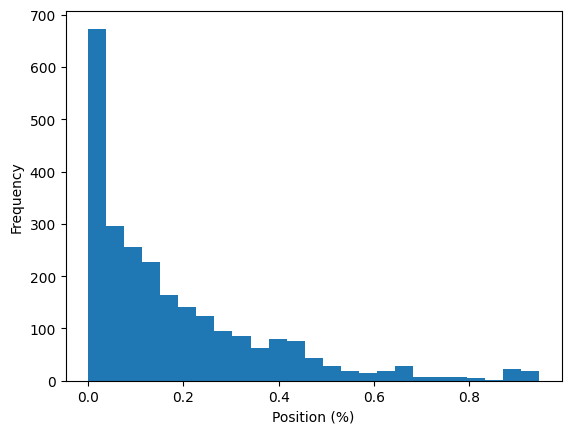

In [44]:
cleanup(out)
rg = RelationalGeneratorAccessFreq(df_no_timestamp)

# rg.generate_queries(cat_columns, k, n_queries, out, 0.5, 0.4, start = 100)
access_frequencies = rg.generate_queries(cat_columns, k, n_queries, out, 0.6, 0.5, start = start)

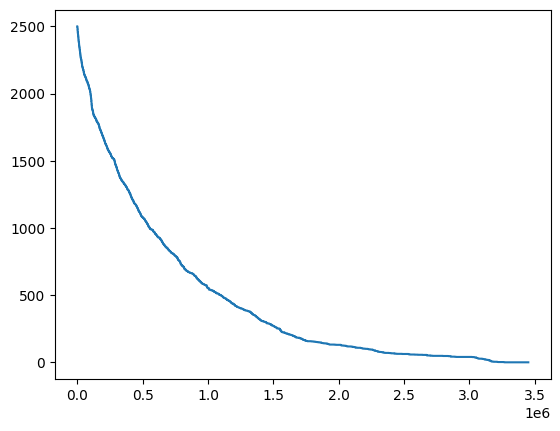

In [45]:
plt.plot(access_frequencies)

In [46]:
rg_size = 2500

np.save('data/access_frequency_skipping_data/NASA/utilities/utilities.npy', access_frequencies)

# remove utility and timestamp columns
df = df.drop(columns=[ 'Timestamp', 'Host'])

# write to parquet with row group size rg_size
pq.write_table(pa.Table.from_pandas(df), 'data/access_frequency_skipping_data/NASA/parquet/NASA.parquet', row_group_size=rg_size)

In [47]:
# load in the parquet file for each dataset and check the number of columns and row groups
# for each dataset
for path in ['data/skipping_data_processed/Real_Estate/parquet/Real_Estate_Sales_2001-2020.parquet', 'data/skipping_data_processed/Electric_Vehicles/parquet/Electric_Vehicle_Population_Data.parquet', 'data/skipping_data_processed/Nasa/parquet/Nasa.parquet']:
    # read in parquet file
    table = pq.read_table(path)
    # get number of columns
    print("Number of columns in {}: {}".format(path.split('/')[-1], table.num_columns))
    print("Number of rows in {}: {}".format(path.split('/')[-1], table.num_rows))

Number of columns in Real_Estate_Sales_2001-2020.parquet: 2
Number of rows in Real_Estate_Sales_2001-2020.parquet: 997162
Number of columns in Electric_Vehicle_Population_Data.parquet: 6
Number of rows in Electric_Vehicle_Population_Data.parquet: 162637
Number of columns in Nasa.parquet: 1
Number of rows in Nasa.parquet: 3452337
